In [1]:
# uploading file from local to use in google colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23875 bytes


In [2]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#importing the tensorflow library
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LeakyReLU, ELU, PReLU
from tensorflow.keras.layers import Dropout

In [3]:
# reading the the csv file using pandas dataframe
data = pd.read_csv('diabetes.csv')

#Display the first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
X = data.iloc[:,:8]
y = data[['Outcome']]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [19]:
#Splitting the datset into test and train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [20]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#Now let's do trails on our model
# Initialising the ANN
classifier2 = Sequential()

# Adding the input layer and the first hidden layer
classifier2.add(Dense(units= 36, kernel_initializer='he_normal', activation='relu', input_dim = 8))
classifier2.add(Dropout(0.3))
# Adding the second hidden layer
classifier2.add(Dense(units= 20,kernel_initializer= 'he_normal',activation='relu'))
classifier2.add(Dropout(0.4))
# Adding the third hidden layer
classifier2.add(Dense(units= 15, kernel_initializer= 'he_normal',activation='relu'))
classifier2.add(Dropout(0.2))
# Adding the output layer
classifier2.add(Dense(units=  1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history1=classifier2.fit(X_train, y_train,validation_split=0.33, batch_size = 16, epochs = 70)

Epoch 1/70
26/26 [==============================] - 2s 28ms/step - loss: 1.1119 - accuracy: 0.5485 - val_loss: 0.7418 - val_accuracy: 0.6010
Epoch 2/70
26/26 [==============================] - 0s 9ms/step - loss: 0.8176 - accuracy: 0.6038 - val_loss: 0.6962 - val_accuracy: 0.6158
Epoch 3/70
26/26 [==============================] - 0s 9ms/step - loss: 0.8824 - accuracy: 0.5768 - val_loss: 0.6656 - val_accuracy: 0.6059
Epoch 4/70
26/26 [==============================] - 0s 11ms/step - loss: 0.7069 - accuracy: 0.5911 - val_loss: 0.6484 - val_accuracy: 0.6158
Epoch 5/70
26/26 [==============================] - 0s 12ms/step - loss: 0.7866 - accuracy: 0.6211 - val_loss: 0.6325 - val_accuracy: 0.6355
Epoch 6/70
26/26 [==============================] - 0s 12ms/step - loss: 0.7479 - accuracy: 0.6068 - val_loss: 0.6232 - val_accuracy: 0.6650
Epoch 7/70
26/26 [==============================] - 0s 12ms/step - loss: 0.7206 - accuracy: 0.6433 - val_loss: 0.6134 - val_accuracy: 0.6897
Epoch 8/70
26/2

In [32]:
# list all data in history
print(model_history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


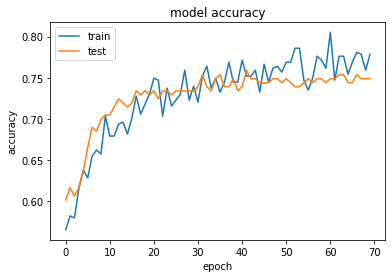

In [33]:
# summarize history for accuracy
plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

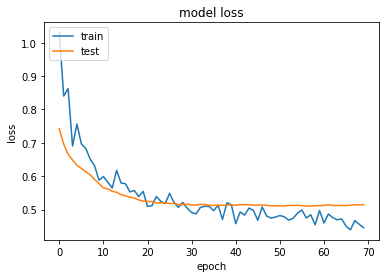

In [34]:
# summarize history for loss
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier2.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
score

0.7857142857142857